In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
figlist = []
MismatchList = []
from zero.data import Series, Response, NoiseDensity
from zero import Circuit
from zero.analysis import AcNoiseAnalysis, AcSignalAnalysis
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4

In [2]:
from TTFSSzeroCTN import *
#This contains all changes made to TTFSS boxes in CTN as well

Test1 Switch is already OFF.
Input from PD. Input node: rfbnIN
Test2 EXC Not Connected.
Common Gain set to 10 dB.
Fast Gain set to 14 dB.
Switched OFF PZT Boost
Positive sign is chosen after PZT stage 5.
Ramp engaged.
Laser PZT Capacitance Added
Test3 Switch is already OFF.
Test3 EXC Not Connected.
EOM Capacitance Added


In [3]:
COMGain(circuit,G=10)
FASTGain(circuit,G=14)
test1SW(circuit,'ON')
LaserConnected(circuit, False)
EOMConnected(circuit, False)

Common Gain set to 10 dB.
Fast Gain set to 14 dB.
Input from Test1 BNC Port. Input node: rfbnIN
Laser PZT Capacitance Removed
EOM Capacitance Removed


In [4]:
data = np.loadtxt('NFSS_Test1toOUT2_29-07-2019_180413.txt')
ff = data[:,0]
Meas = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
analysis = AcSignalAnalysis(circuit=circuit)
TFfromrfbIN = analysis.calculate(frequencies=ff, input_type="voltage", node="rfbnIN")
Sim = TFfromrfbIN.get_response(sink='comnOUT2').complex_magnitude
TFDict = {}
TFDict['Measured'] = [ff,Meas]
TFDict['Simulated'] = [ff,Sim]

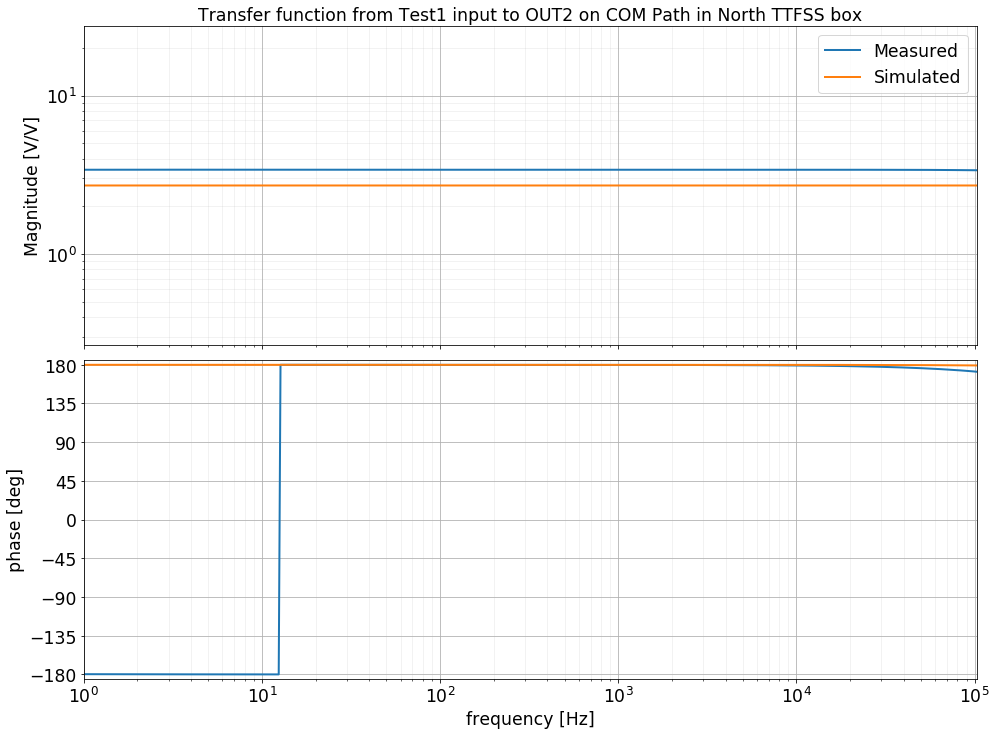

In [5]:
tfsMat = list(TFDict.items())
fig = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig.axes[0]
phase_ax = fig.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from Test1 input to OUT2 on COM Path in North TTFSS box')
mag_ax.legend()
figlist += [fig]

In [6]:
test2SW(circuit,'ON',rout1="NC",rout2="NC")

Test2 EXC is connected.
Input node: test2ExcnIN
NC Ohm and NC Ohm impedances connected to OUT1 and OUT2 respectively.
For different input impedance of measuring instrument, change values of comOUT1 and comOUT2


In [7]:
data = np.loadtxt('NFSS_Test2toTP4_06-08-2019_165608.txt')
ff = data[:,0]
MeasTFtp4 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
analysis = AcSignalAnalysis(circuit=circuit)
TFfromtest2Exc = analysis.calculate(frequencies=ff, input_type="voltage", node="test2ExcnIN")
SimTFtp4 = TFfromtest2Exc.get_response(sink='comntp4').complex_magnitude
TFDict2 = {}
TFDict2['Measured'] = [ff,MeasTFtp4]
TFDict2['Simulated'] = [ff,SimTFtp4]

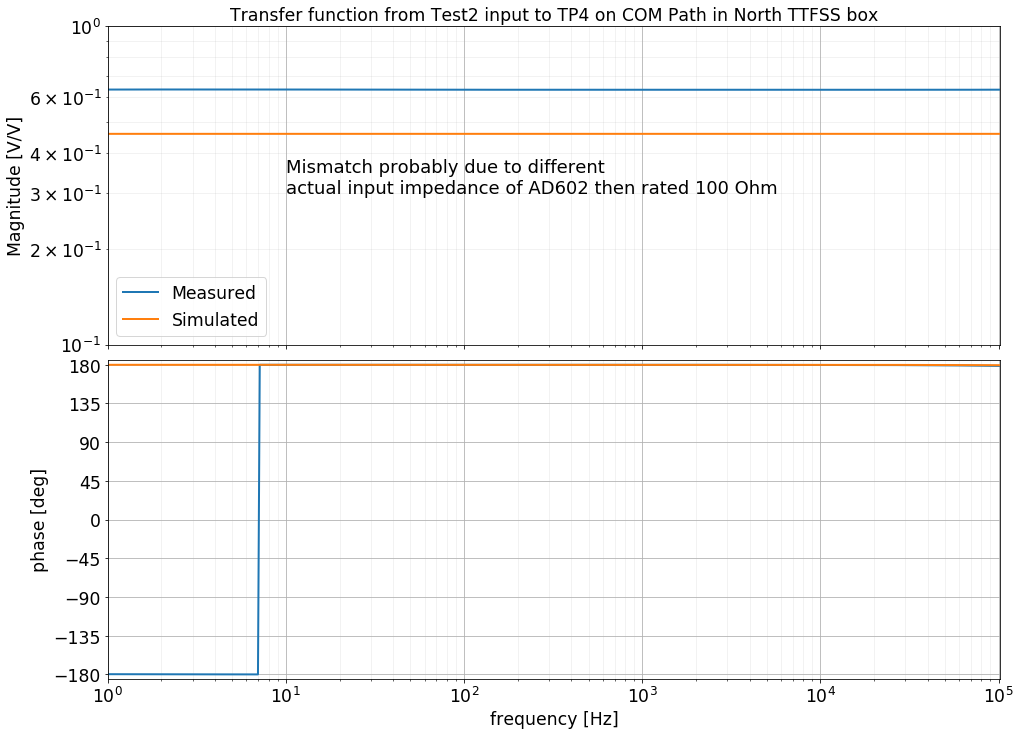

In [8]:
tfsMat = list(TFDict2.items())
fig2 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig2.axes[0]
phase_ax = fig2.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from Test2 input to TP4 on COM Path in North TTFSS box')
mag_ax.legend()
mag_ax.set_ylim((1e-1,1))
mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig2]

In [9]:
data = np.loadtxt('NFSS_Test2toTP17_07-08-2019_143521.txt')
MeasTFtp17 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp17 = TFfromtest2Exc.get_response(sink='pztntp17').complex_magnitude
TFDict3 = {}
TFDict3['Measured'] = [ff, MeasTFtp17/MeasTFtp4]
TFDict3['Simulated'] = [ff, SimTFtp17/SimTFtp4]

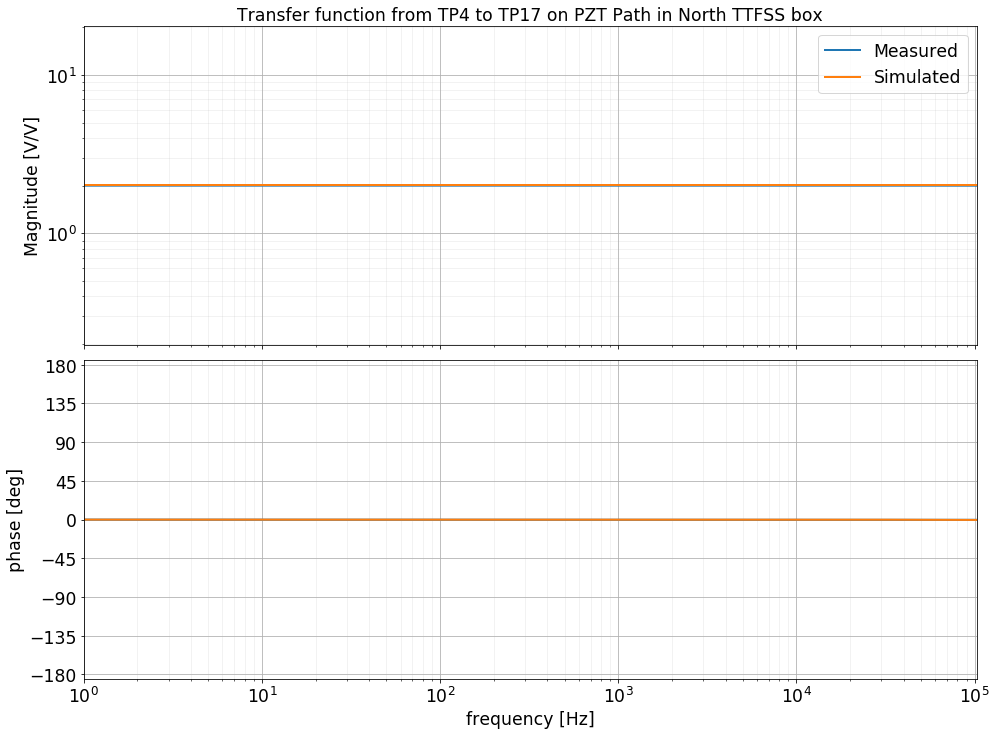

In [10]:
tfsMat = list(TFDict3.items())
fig3 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig3.axes[0]
phase_ax = fig3.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP4 to TP17 on PZT Path in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig3]

In [11]:
data = np.loadtxt('NFSS_Test2toTP14_07-08-2019_161842.txt')
MeasTFtp14 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp14 = TFfromtest2Exc.get_response(sink='pztntp14').complex_magnitude
TFDict4 = {}
TFDict4['Measured'] = [ff,MeasTFtp14/MeasTFtp17]
TFDict4['Simulated'] = [ff,SimTFtp14/SimTFtp17]

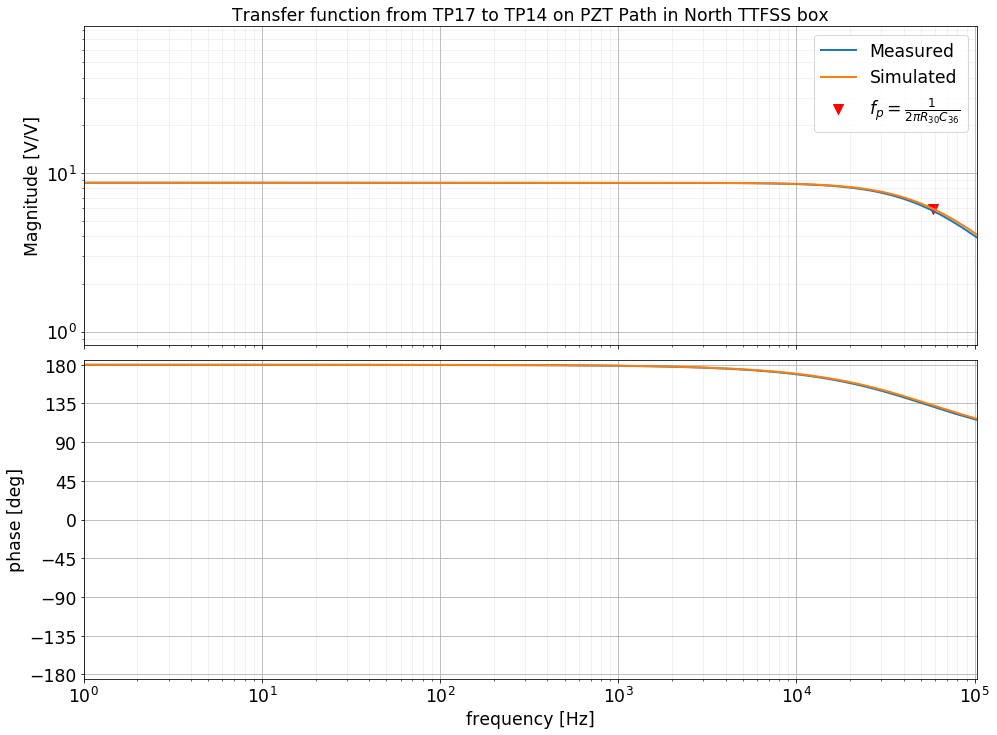

In [12]:
tfsMat = list(TFDict4.items())
fig4 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig4.axes[0]
phase_ax = fig4.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fp = 1/(2*np.pi*circuit['pztR30'].value*circuit['pztC36'].value)
ffind = np.argmin(np.abs(ff-fp))
TFfp = np.abs(TFDict4['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{30}C_{36}}$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP17 to TP14 on PZT Path in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig4]

In [13]:
data = np.loadtxt('NFSS_Test2toTP15_07-08-2019_162543.txt')
MeasTFtp15 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp15 = TFfromtest2Exc.get_response(sink='pztntp15').complex_magnitude
TFDict5 = {}
TFDict5['Measured'] = [ff,MeasTFtp15/MeasTFtp14]
TFDict5['Simulated'] = [ff,SimTFtp15/SimTFtp14]

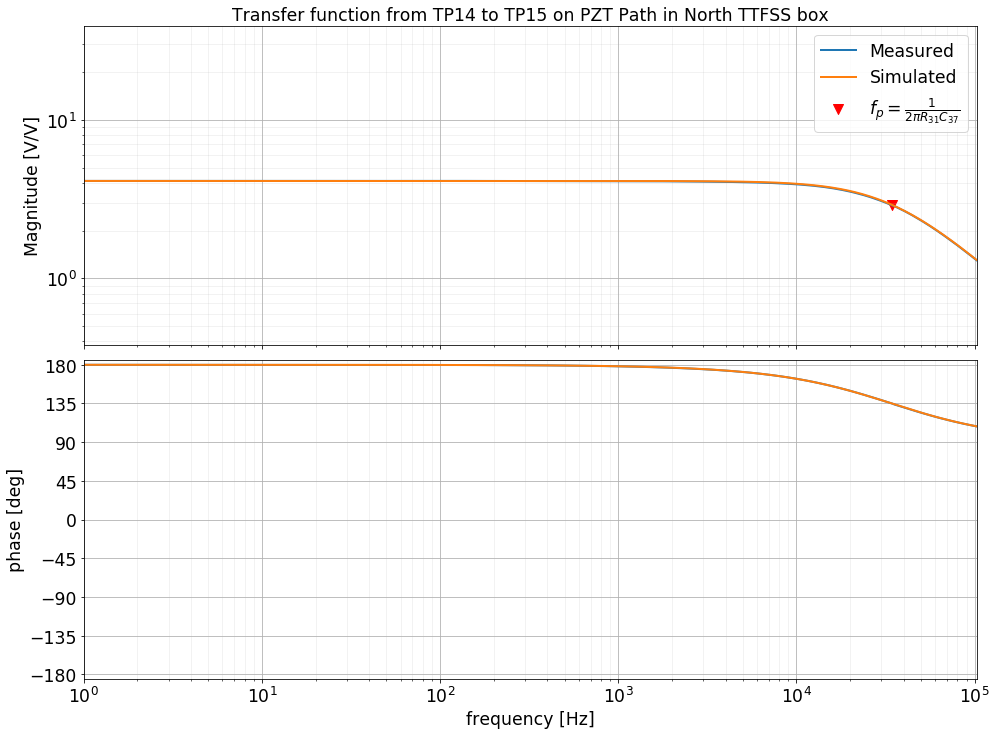

In [14]:
tfsMat = list(TFDict5.items())
fig5 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig5.axes[0]
phase_ax = fig5.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fp = 1/(2*np.pi*circuit['pztR31'].value*circuit['pztC37'].value)
ffind = np.argmin(np.abs(ff-fp))
TFfp = np.abs(TFDict5['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{31}C_{37}}$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP14 to TP15 on PZT Path in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig5]

In [15]:
data = np.loadtxt('NFSS_Test2toTP16_07-08-2019_163214.txt')
MeasTFtp16 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp16 = TFfromtest2Exc.get_response(sink='pztntp16').complex_magnitude
TFDict6 = {}
TFDict6['Measured'] = [ff,MeasTFtp16/MeasTFtp15]
TFDict6['Simulated'] = [ff,SimTFtp16/SimTFtp15]

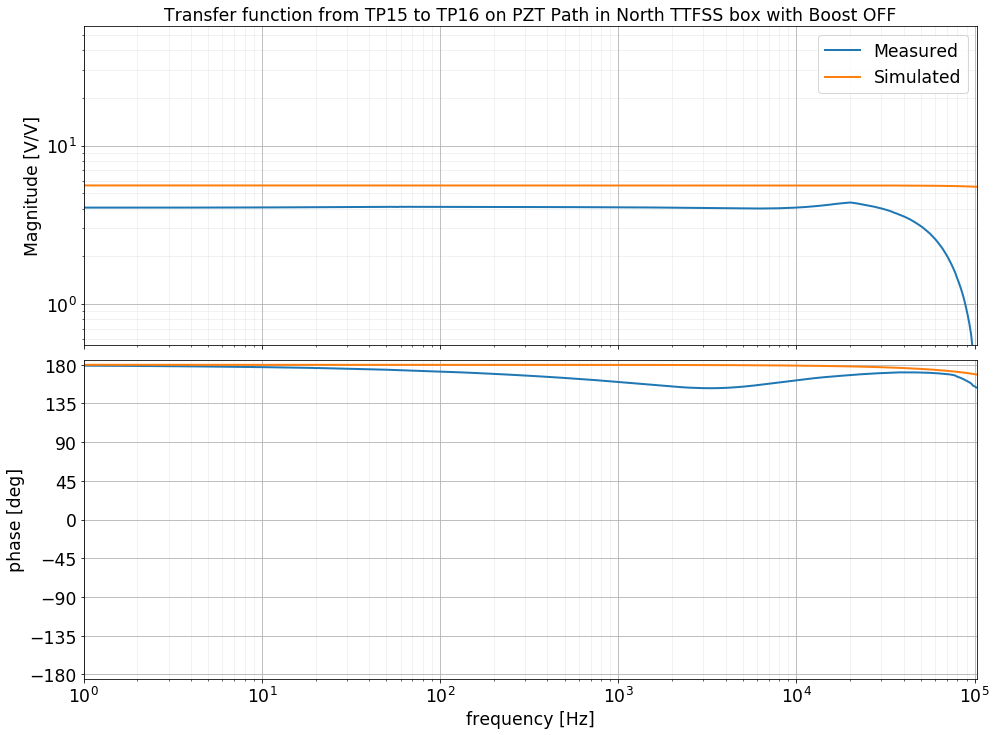

In [16]:
tfsMat = list(TFDict6.items())
fig6 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig6.axes[0]
phase_ax = fig6.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP15 to TP16 on PZT Path in North TTFSS box with Boost OFF')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig6]

In [17]:
MismatchList += [fig6]

In [18]:
PZTBoost(circuit, 'ON')

Switched ON PZT Boost


In [19]:
data = np.loadtxt('NFSS_Test2toTP16BoostOn_07-08-2019_171118.txt')
MeasTFtp16BON = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
analysis = AcSignalAnalysis(circuit=circuit)
TFfromtest2ExcBON = analysis.calculate(frequencies=ff, input_type="voltage", node="test2ExcnIN")
SimTFtp16BON = TFfromtest2ExcBON.get_response(sink='pztntp16').complex_magnitude
TFDict61 = {}
TFDict61['Measured'] = [ff,MeasTFtp16BON/MeasTFtp15]
TFDict61['Simulated'] = [ff,SimTFtp16BON/SimTFtp15]

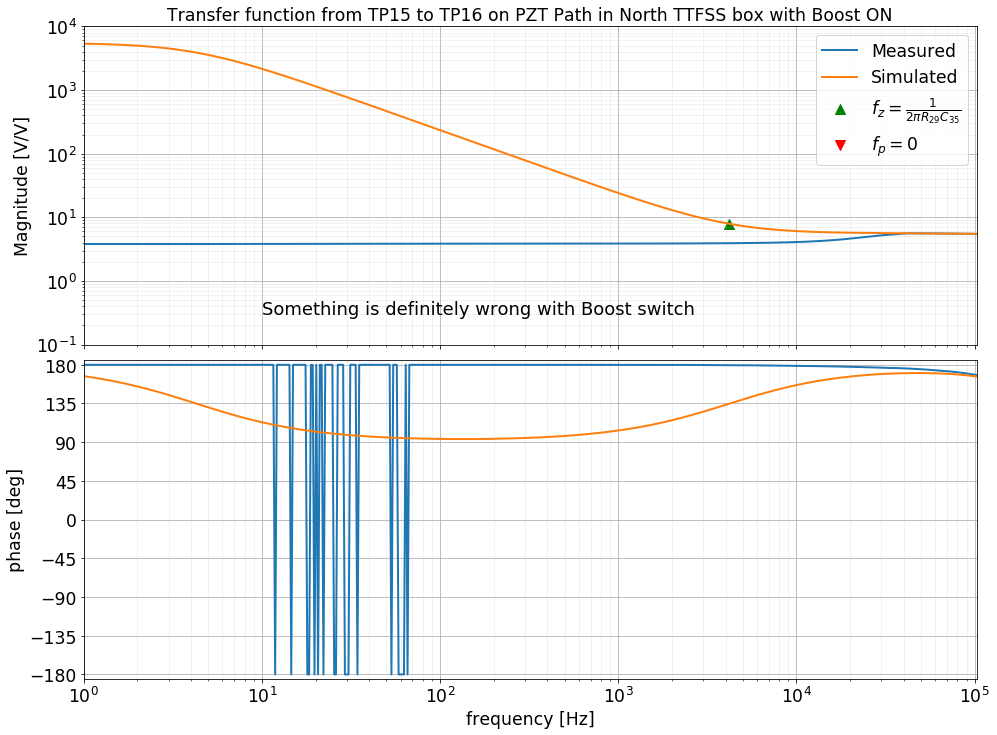

In [20]:
tfsMat = list(TFDict61.items())
fig61 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig61.axes[0]
phase_ax = fig61.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fz = 1/(2*np.pi*circuit['pztR29'].value*circuit['pztC35'].value)
ffind = np.argmin(np.abs(ff-fz))
TFfz = np.abs(TFDict61['Simulated'][1][ffind])
mag_ax.scatter(fz,TFfz,100,marker='^',color='g',label=r'$f_z = \frac{1}{2\pi R_{29}C_{35}}$')
mag_ax.scatter(0,0,100,marker='v',color='r',label=r'$f_p = 0$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP15 to TP16 on PZT Path in North TTFSS box with Boost ON')
mag_ax.legend()
mag_ax.set_ylim((1e-1,1e4))
mag_ax.text(10,3e-1,'Something is definitely wrong with Boost switch',fontsize=18)
figlist += [fig61]

In [21]:
MismatchList += [fig61]

In [22]:
data = np.loadtxt('NFSS_Test2toTP18_07-08-2019_163835.txt')
MeasTFtp18 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp18 = TFfromtest2Exc.get_response(sink='pztntp18').complex_magnitude
TFDict7 = {}
TFDict7['Measured'] = [ff,MeasTFtp18/MeasTFtp16]
TFDict7['Simulated'] = [ff,SimTFtp18/SimTFtp16]

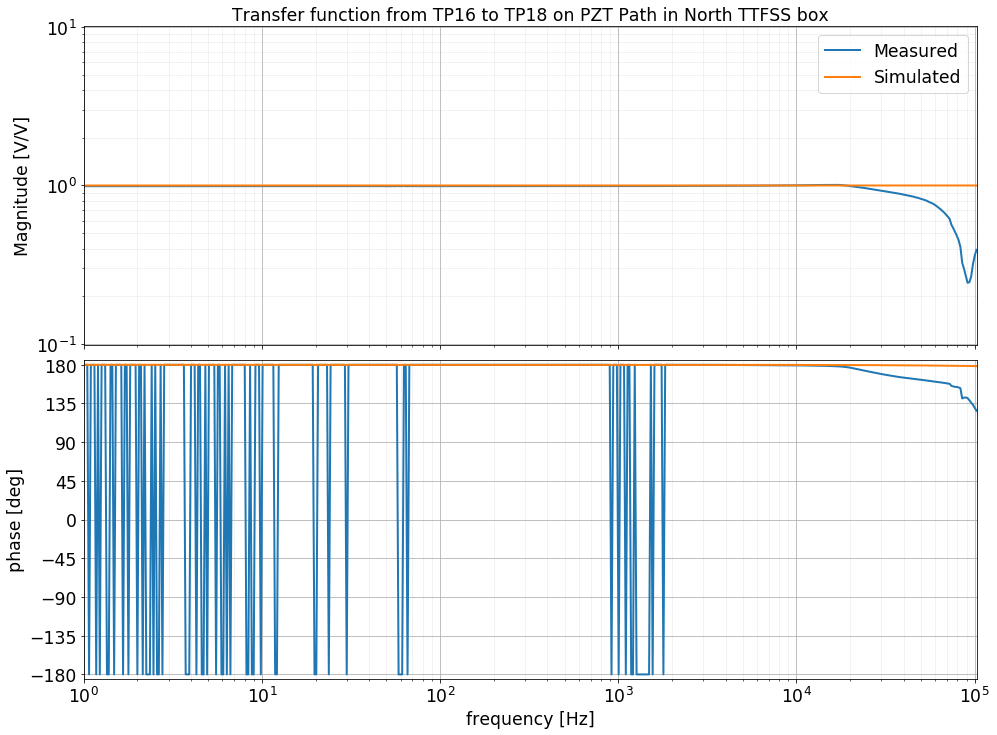

In [23]:
tfsMat = list(TFDict7.items())
fig7 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig7.axes[0]
phase_ax = fig7.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP16 to TP18 on PZT Path in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig7]

In [24]:
MismatchList += [fig7]

In [25]:
data = np.loadtxt('NFSS_Test2toTP19_07-08-2019_165137.txt')
MeasTFtp19 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp19 = TFfromtest2Exc.get_response(sink='pztntp19').complex_magnitude
TFDict71 = {}
TFDict71['Measured'] = [ff,MeasTFtp19/MeasTFtp18]
TFDict71['Simulated'] = [ff,SimTFtp19/SimTFtp18]

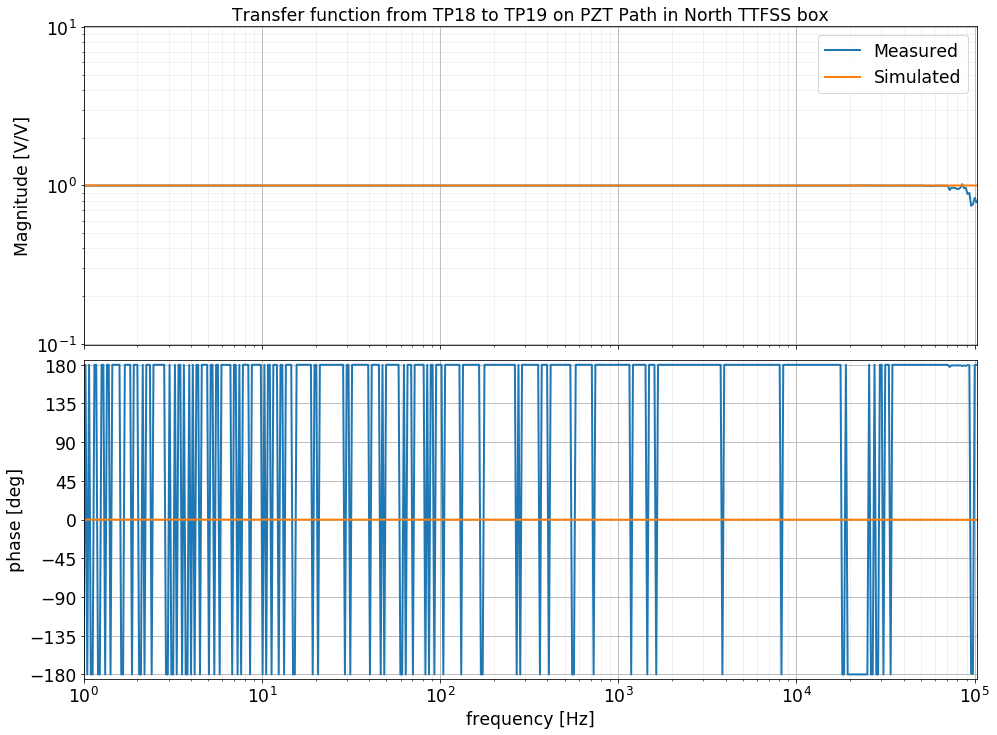

In [26]:
tfsMat = list(TFDict71.items())
fig71 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig71.axes[0]
phase_ax = fig71.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP18 to TP19 on PZT Path in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig71]

In [27]:
data = np.loadtxt('NFSS_Test2topztOut_07-08-2019_170001.txt')
MeasTFpztOut = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFpztOut = TFfromtest2Exc.get_response(sink='pztnOUT').complex_magnitude
TFDict8 = {}
TFDict8['Measured'] = [ff,MeasTFpztOut/MeasTFtp19]
TFDict8['Simulated'] = [ff,SimTFpztOut/SimTFtp19]

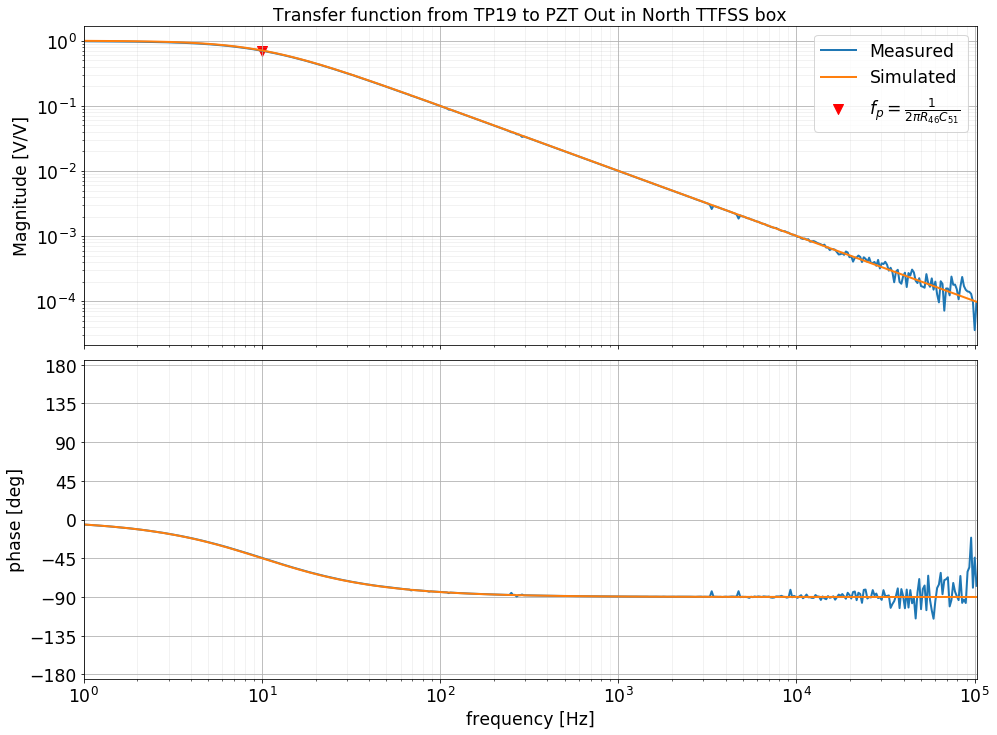

In [28]:
tfsMat = list(TFDict8.items())
fig8 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig8.axes[0]
phase_ax = fig8.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fp = 1/(2*np.pi*circuit['pztR46'].value*circuit['pztC51'].value)
ffind = np.argmin(np.abs(ff-fp))
TFfp = np.abs(TFDict8['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{46}C_{51}}$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP19 to PZT Out in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig8]

In [29]:
data = np.vstack((np.loadtxt('NFSS_Test2toTP4_06-08-2019_165608.txt'),np.loadtxt('NFSS_Test2toTP4_HF_06-08-2019_165228.txt')))
MeasTFtp4Wide = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)

data = np.vstack((np.loadtxt('NFSS_Test2toTP11_07-08-2019_172212.txt'),np.loadtxt('NFSS_Test2toTP11HF_07-08-2019_173834.txt')))
Wideff = data[:,0]
MeasTFtp11 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)

analysis = AcSignalAnalysis(circuit=circuit)
TFfromtest2ExcWide = analysis.calculate(frequencies=Wideff, input_type="voltage", node="test2ExcnIN")
SimTFtp11 = TFfromtest2ExcWide.get_response(sink='eomntp11').complex_magnitude
SimTFtp4Wide = TFfromtest2ExcWide.get_response(sink='comntp4').complex_magnitude
TFDict9 = {}
TFDict9['Measured'] = [Wideff,MeasTFtp11/MeasTFtp4Wide]
TFDict9['Simulated'] = [Wideff,SimTFtp11/SimTFtp4Wide]

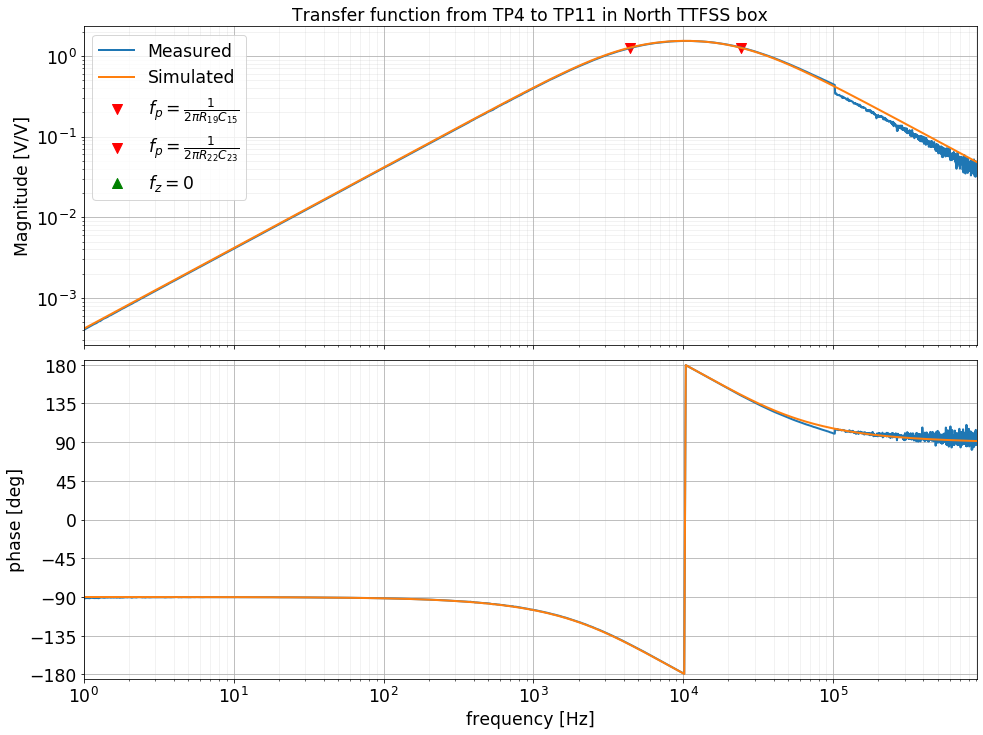

In [30]:
tfsMat = list(TFDict9.items())
fig9 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig9.axes[0]
phase_ax = fig9.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fp = 1/(2*np.pi*circuit['eomR19'].value*circuit['eomC15'].value)
ffind = np.argmin(np.abs(Wideff-fp))
TFfp = np.abs(TFDict9['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{19}C_{15}}$')
fp = 1/(2*np.pi*circuit['eomR22'].value*circuit['eomC23'].value)
ffind = np.argmin(np.abs(Wideff-fp))
TFfp = np.abs(TFDict9['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{22}C_{23}}$')
mag_ax.scatter(0,0,100,marker='^',color='g',label=r'$f_z = 0$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP4 to TP11 in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig9]

In [31]:
data = np.vstack((np.loadtxt('NFSS_Test2toTP12_07-08-2019_172925.txt'),np.loadtxt('NFSS_Test2toTP12HF_07-08-2019_173556.txt')))
MeasTFtp12 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp12 = TFfromtest2ExcWide.get_response(sink='eomntp12').complex_magnitude
TFDict10 = {}
TFDict10['Measured'] = [Wideff,MeasTFtp12/MeasTFtp11]
TFDict10['Simulated'] = [Wideff,SimTFtp12/SimTFtp11]

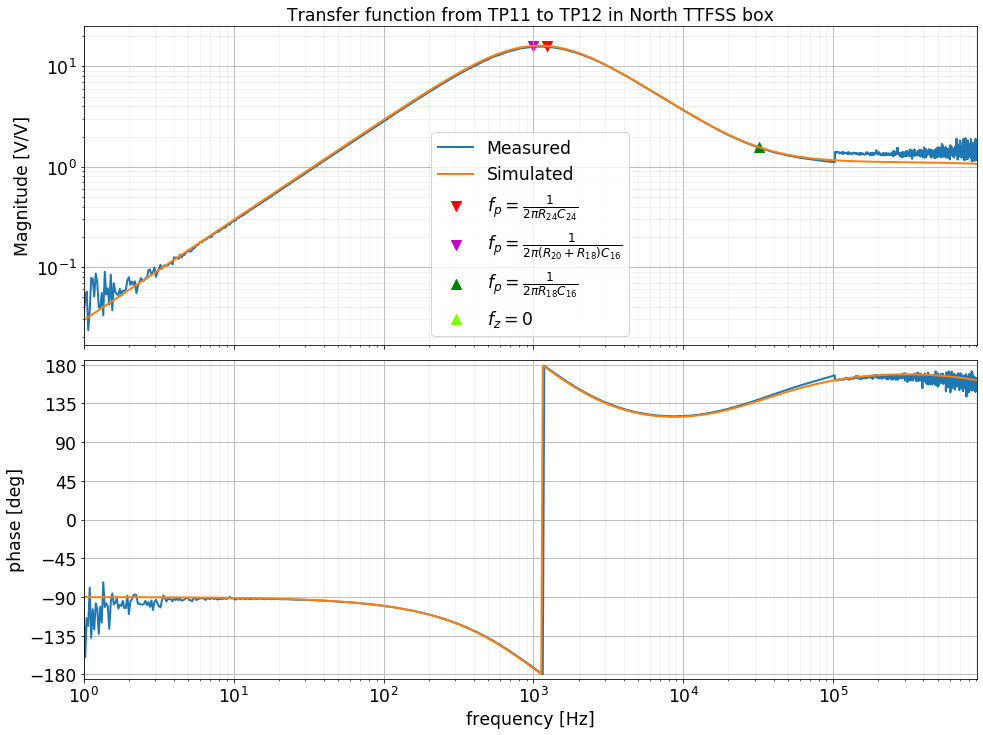

In [32]:
tfsMat = list(TFDict10.items())
fig10 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig10.axes[0]
phase_ax = fig10.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
fp = 1/(2*np.pi*circuit['eomR24'].value*circuit['eomC24'].value)
ffind = np.argmin(np.abs(Wideff-fp))
TFfp = np.abs(TFDict10['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='r',label=r'$f_p = \frac{1}{2\pi R_{24}C_{24}}$')
fp = 1/(2*np.pi*(circuit['eomR20'].value+circuit['eomR18'].value)*circuit['eomC16'].value)
ffind = np.argmin(np.abs(Wideff-fp))
TFfp = np.abs(TFDict10['Simulated'][1][ffind])
mag_ax.scatter(fp,TFfp,100,marker='v',color='m',label=r'$f_p = \frac{1}{2\pi (R_{20}+ R_{18})C_{16}}$')
fz = 1/(2*np.pi*circuit['eomR18'].value*circuit['eomC16'].value)
ffind = np.argmin(np.abs(Wideff-fz))
TFfz = np.abs(TFDict10['Simulated'][1][ffind])
mag_ax.scatter(fz,TFfz,100,marker='^',color='g',label=r'$f_p = \frac{1}{2\pi R_{18}C_{16}}$')
mag_ax.scatter(0,0,100,marker='^',color='#7FFF00',label=r'$f_z = 0$')
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP11 to TP12 in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig10]

In [33]:
fp

994.4076419362408

In [34]:
data = np.vstack((np.loadtxt('NFSS_Test2toTP13_09-08-2019_092514.txt'),np.loadtxt('NFSS_Test2toTP13HF_09-08-2019_093542.txt')))
MeasTFtp13 = 10**(data[:,1]/20)*np.exp(1j*data[:,2]*np.pi/180)
SimTFtp13 = TFfromtest2ExcWide.get_response(sink='eomntp13').complex_magnitude
TFDict12 = {}
TFDict12['Measured'] = [Wideff,MeasTFtp13/MeasTFtp4Wide]
TFDict12['Simulated'] = [Wideff,SimTFtp13/SimTFtp4Wide]

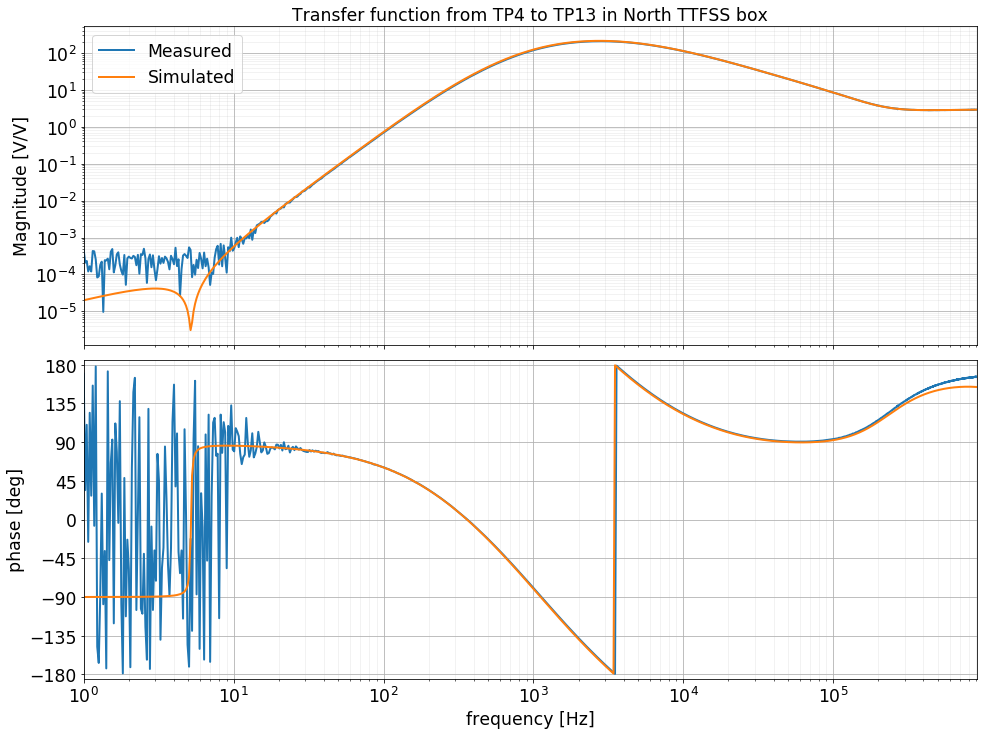

In [35]:
tfsMat = list(TFDict12.items())
fig12 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,12])
mag_ax = fig12.axes[0]
phase_ax = fig12.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer function from TP4 to TP13 in North TTFSS box')
mag_ax.legend()
#mag_ax.set_ylim((1e-1,1))
#mag_ax.text(10,3e-1,'Mismatch probably due to different\nactual input impedance of AD602 then rated 100 Ohm',fontsize=18)
figlist += [fig12]

In [36]:
pp = PdfPages('NorthFSSInvestigation.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()

pp = PdfPages('NorthFSSInvestigationMismatches.pdf')
for fig in MismatchList:
    pp.savefig(fig,bbox_inches='tight')
pp.close()